In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

STEPS NEED TO BE DONE FOR RANDOM WALK ND TO PLOT HOW ANY FLY OR BUG ROAMS :
step 1: Modeling the steps
step 2: Modeling the trajectory
step3: Based on trajectory visualize the data
-ve means backward steps + ve means bug is movinf forward from its source to destination

a= [1, -0.5, 1.8] # gives trajectory of [] 1, 0.5,2.3
np.cumsum(a) # gives the same output as done manually

In [10]:
# RANDOM WALK
# generate steps
n_steps = 300

# x- axis
x_steps= np.random.normal(size= n_steps)# size : how far u go in step

In [11]:
# form the trajectory based on x_steps
x= np.cumsum(x_steps)

In [12]:
# y- axis
y_steps = np.random.normal(size= n_steps)
y_steps
y = np.cumsum(y_steps)

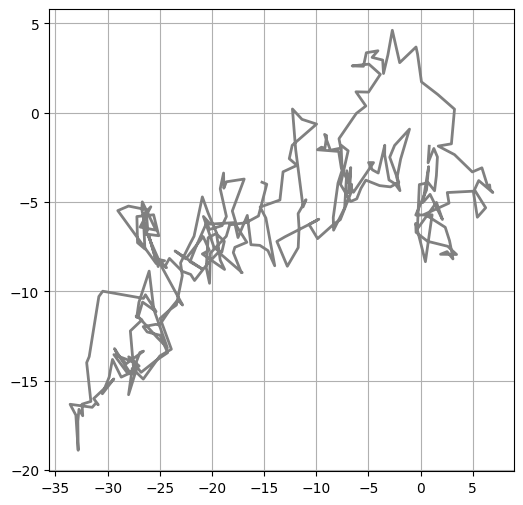

In [15]:
plt.figure(figsize=(6,6))
plt.plot(x,y,color='grey' , linewidth=2)
plt.grid(True)
plt.show()

In [ ]:
# SURVIVAL ANALYSIS
# installing lifeline library
!pip install lifelines


In [17]:
from lifelines import KaplanMeierFitter

In [18]:
df = pd.read_csv('/content/survival_analysis_dataset.csv')
df.head()

,surgery_year,die_year
0,2001,lost
1,2000,still alive
2,2022,lost
3,2017,lost
4,2004,2005


In [20]:
# Adding some column to survival analysis
# Firstly define the current year and calculation duration between surgery and die_year
current_year= 2023
df['duration'] = df['die_year'].apply(lambda x: int(x) if x.isdigit() else current_year) - df['surgery_year']
df.head()

,surgery_year,die_year,duration
0,2001,lost,22
1,2000,still alive,23
2,2022,lost,1
3,2017,lost,6
4,2004,2005,1


In [21]:
# Define the event as slides in canvas we need event
df['event']= df['die_year'].apply(lambda x: 1 if x.isdigit() else 0) # 1 means died patient and 0 means still alive
df.head()

,surgery_year,die_year,duration,event
0,2001,lost,22,0
1,2000,still alive,23,0
2,2022,lost,1,0
3,2017,lost,6,0
4,2004,2005,1,1


In [22]:
# conduct the Survival analysis
kmf= KaplanMeierFitter()
kmf.fit(df['duration'],df['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 100 total observations, 68 right-censored observations>

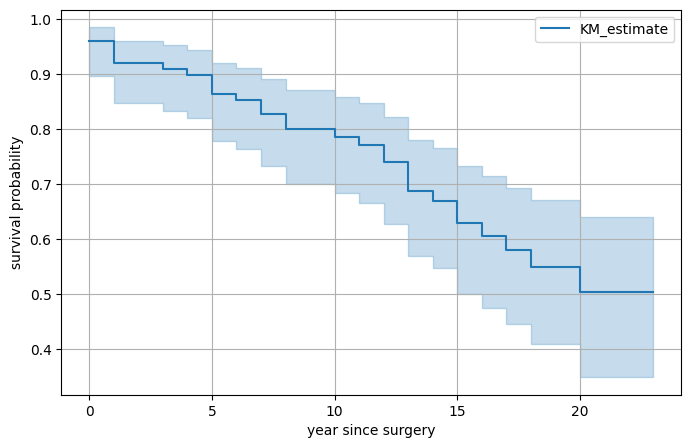

In [23]:
# visualizing the survival function
plt.figure(figsize=(8,5))
kmf.plot()
plt.ylabel('survival probability')
plt.xlabel('year since surgery')
plt.grid(True)
plt.show()
# variation is seen by light color in the graph
# estimated is seen by dark color in the graph